#Machine Learning Classifications

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import pandas as pd
import seaborn as sns

In [17]:
data = pd.read_csv('features_3_sec.csv')
data = data.iloc[0:, 1:]
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [18]:
data.columns

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label'

In [19]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale.

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns = cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def model_assess(model, title="Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Performance metrics for", title)
    print(classification_report(y_test, preds))

In [35]:
# LightGBM Classifier
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1)
report_lgbm = model_assess(lgbm, "LightGBM")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14328
[LightGBM] [Info] Number of data points in the train set: 6993, number of used features: 57
[LightGBM] [Info] Start training from score -2.329103
[LightGBM] [Info] Start training from score -2.315973
[LightGBM] [Info] Start training from score -2.285992
[LightGBM] [Info] Start training from score -2.304446
[LightGBM] [Info] Start training from score -2.320331
[LightGBM] [Info] Start training from score -2.281782
[LightGBM] [Info] Start training from score -2.305880
[LightGBM] [Info] Start training from score -2.255519
[LightGBM] [Info] Start training from score -2.324707
[LightGBM] [Info] Start training from score -2.304446
Performance metrics for LightGBM
              precision    recall  f1-score   support

       blues       0.91      0.87      0.89       319
   classical       0.95      

In [36]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
report_knn = model_assess(knn, "KNN")

Performance metrics for KNN
              precision    recall  f1-score   support

       blues       0.90      0.89      0.90       319
   classical       0.91      0.97      0.94       308
     country       0.78      0.84      0.81       286
       disco       0.82      0.91      0.86       301
      hiphop       0.91      0.87      0.89       311
        jazz       0.89      0.88      0.88       286
       metal       0.98      0.93      0.96       303
         pop       0.95      0.90      0.93       267
      reggae       0.88      0.91      0.90       316
        rock       0.90      0.80      0.85       300

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997



In [37]:

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
report_rf = model_assess(rf, "Random Forest")


Performance metrics for Random Forest
              precision    recall  f1-score   support

       blues       0.88      0.83      0.85       319
   classical       0.91      0.96      0.94       308
     country       0.74      0.79      0.76       286
       disco       0.83      0.84      0.83       301
      hiphop       0.93      0.86      0.90       311
        jazz       0.83      0.89      0.86       286
       metal       0.89      0.94      0.91       303
         pop       0.86      0.93      0.89       267
      reggae       0.87      0.85      0.86       316
        rock       0.85      0.69      0.76       300

    accuracy                           0.86      2997
   macro avg       0.86      0.86      0.86      2997
weighted avg       0.86      0.86      0.86      2997



In [38]:

# Support Vector Machine
svm = SVC(probability=True)
report_svm = model_assess(svm, "SVM")



Performance metrics for SVM
              precision    recall  f1-score   support

       blues       0.75      0.76      0.75       319
   classical       0.87      0.95      0.91       308
     country       0.69      0.67      0.68       286
       disco       0.61      0.66      0.64       301
      hiphop       0.80      0.71      0.75       311
        jazz       0.78      0.82      0.80       286
       metal       0.81      0.89      0.85       303
         pop       0.81      0.87      0.84       267
      reggae       0.75      0.70      0.72       316
        rock       0.63      0.52      0.57       300

    accuracy                           0.75      2997
   macro avg       0.75      0.76      0.75      2997
weighted avg       0.75      0.75      0.75      2997



In [40]:
# Bagging Classifier
bagging = BaggingClassifier(n_estimators=100)
report_bagging = model_assess(bagging, "Bagging")


Performance metrics for Bagging
              precision    recall  f1-score   support

       blues       0.86      0.82      0.84       319
   classical       0.93      0.93      0.93       308
     country       0.70      0.80      0.75       286
       disco       0.83      0.78      0.80       301
      hiphop       0.86      0.81      0.83       311
        jazz       0.80      0.86      0.83       286
       metal       0.87      0.91      0.89       303
         pop       0.87      0.90      0.88       267
      reggae       0.82      0.82      0.82       316
        rock       0.82      0.72      0.77       300

    accuracy                           0.83      2997
   macro avg       0.83      0.83      0.83      2997
weighted avg       0.84      0.83      0.83      2997



In [41]:

# Extra Trees Classifier
extra_trees = ExtraTreesClassifier(n_estimators=100)
report_extra_trees = model_assess(extra_trees, "Extra Trees")

Performance metrics for Extra Trees
              precision    recall  f1-score   support

       blues       0.94      0.87      0.90       319
   classical       0.90      0.98      0.94       308
     country       0.79      0.85      0.81       286
       disco       0.87      0.88      0.88       301
      hiphop       0.94      0.90      0.92       311
        jazz       0.89      0.90      0.90       286
       metal       0.93      0.94      0.93       303
         pop       0.87      0.94      0.90       267
      reggae       0.89      0.87      0.88       316
        rock       0.91      0.78      0.84       300

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997



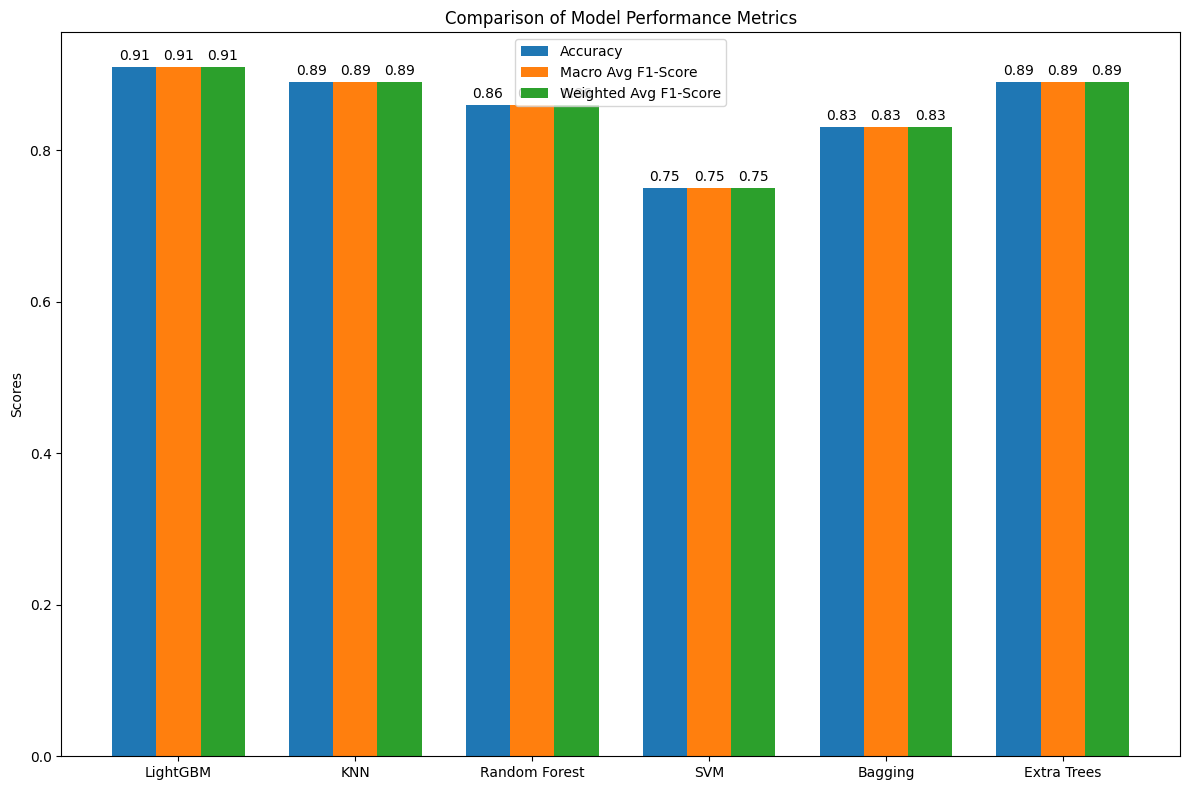

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each model based on the provided performance metrics
models = ['LightGBM', 'KNN', 'Random Forest', 'SVM', 'Bagging', 'Extra Trees']
accuracy = [0.91, 0.89, 0.86, 0.75, 0.83, 0.89]
macro_avg_f1 = [0.91, 0.89, 0.86, 0.75, 0.83, 0.89]
weighted_avg_f1 = [0.91, 0.89, 0.86, 0.75, 0.83, 0.89]

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, macro_avg_f1, width, label='Macro Avg F1-Score')
rects3 = ax.bar(x + width, weighted_avg_f1, width, label='Weighted Avg F1-Score')

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add labels on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding labels on top of each bar
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

fig.tight_layout()

plt.show()
